In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Load and prepare the dataset

In [2]:
df = pd.read_csv('agaricus-lepiota.data', header=None)
df_subset = df[[0, 5, 3]].copy()
df_subset.columns = ['edibility', 'odor', 'cap_color']

## Convert categorical values to numeric

In [3]:
edibility_map = {'e': 0, 'p': 1}
df_subset['edibility'] = df_subset['edibility'].map(edibility_map)

odor_map = {'a': 0, 'l': 1, 'c': 2, 'y': 3, 'f': 4, 'm': 5, 'n': 6, 'p': 7, 's': 8}
df_subset['odor'] = df_subset['odor'].map(odor_map)

cap_color_map = {'n': 0, 'b': 1, 'c': 2, 'g': 3, 'r': 4, 'p': 5, 'u': 6, 'e': 7, 'w': 8, 'y': 9}
df_subset['cap_color'] = df_subset['cap_color'].map(cap_color_map)

df_subset.head()

,edibility,odor,cap_color
0,1,7,0
1,0,0,9
2,0,1,8
3,1,7,8
4,0,6,3


## Create dummy variables for odor

In [17]:
odor_dummies = pd.get_dummies(df_subset['odor'], prefix='odor')
odor_dummies.head()

,odor_0,odor_1,odor_2,odor_3,odor_4,odor_5,odor_6,odor_7,odor_8
0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0


## Model 1: Predict edibility using only odor

In [18]:
X_odor = odor_dummies
y = df_subset['edibility']

X_train_odor, X_test_odor, y_train_odor, y_test_odor = train_test_split(X_odor, y, test_size=0.3, random_state=42)

model_odor = DecisionTreeClassifier(random_state=42)
model_odor.fit(X_train_odor, y_train_odor)

y_pred_odor = model_odor.predict(X_test_odor)
accuracy_odor = accuracy_score(y_test_odor, y_pred_odor)

print(f"Accuracy using odor: {accuracy_odor:.4f}")

Accuracy using odor: 0.9840


## Confusion matrix for odor model

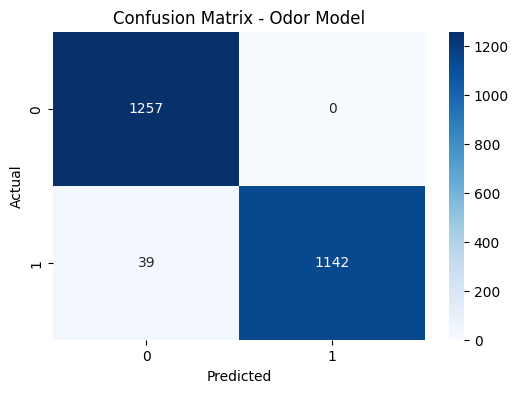

In [19]:
cm_odor = confusion_matrix(y_test_odor, y_pred_odor)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_odor, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Odor Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Classification report for odor model

In [20]:
print("Classification Report - Odor Model:")
print(classification_report(y_test_odor, y_pred_odor, target_names=['Edible', 'Poisonous']))

Classification Report - Odor Model:
              precision    recall  f1-score   support

      Edible       0.97      1.00      0.98      1257
   Poisonous       1.00      0.97      0.98      1181

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



## Create dummy variables for cap color

In [21]:
cap_color_dummies = pd.get_dummies(df_subset['cap_color'], prefix='cap_color')
cap_color_dummies.head()

,cap_color_0,cap_color_1,cap_color_2,cap_color_3,cap_color_4,cap_color_5,cap_color_6,cap_color_7,cap_color_8,cap_color_9
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0


## Model 2: Predict edibility using only cap color

In [22]:
X_cap = cap_color_dummies
y = df_subset['edibility']

X_train_cap, X_test_cap, y_train_cap, y_test_cap = train_test_split(X_cap, y, test_size=0.3, random_state=42)

model_cap = DecisionTreeClassifier(random_state=42)
model_cap.fit(X_train_cap, y_train_cap)

y_pred_cap = model_cap.predict(X_test_cap)
accuracy_cap = accuracy_score(y_test_cap, y_pred_cap)

print(f"Accuracy using cap color: {accuracy_cap:.4f}")

Accuracy using cap color: 0.5870


## Confusion matrix for cap color model

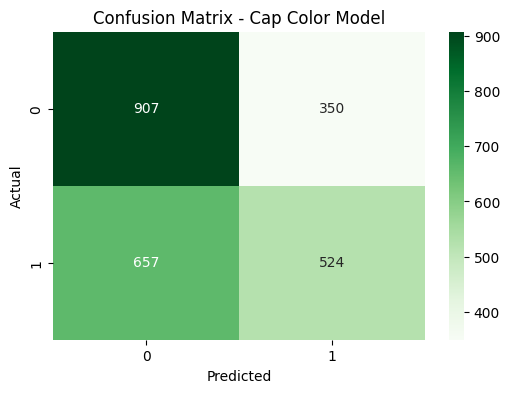

In [23]:
cm_cap = confusion_matrix(y_test_cap, y_pred_cap)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_cap, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Cap Color Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Classification report for cap color model

In [24]:
print(classification_report(y_test_cap, y_pred_cap, target_names=['Edible', 'Poisonous']))

              precision    recall  f1-score   support

      Edible       0.58      0.72      0.64      1257
   Poisonous       0.60      0.44      0.51      1181

    accuracy                           0.59      2438
   macro avg       0.59      0.58      0.58      2438
weighted avg       0.59      0.59      0.58      2438



## Model 3: Predict edibility using both features

In [25]:
X_combined = pd.concat([odor_dummies, cap_color_dummies], axis=1)
y = df_subset['edibility']

X_train_comb, X_test_comb, y_train_comb, y_test_comb = train_test_split(X_combined, y, test_size=0.3, random_state=42)

model_combined = DecisionTreeClassifier(random_state=42)
model_combined.fit(X_train_comb, y_train_comb)

y_pred_comb = model_combined.predict(X_test_comb)
accuracy_comb = accuracy_score(y_test_comb, y_pred_comb)

print(f"Accuracy using both odor and cap color: {accuracy_comb:.4f}")

Accuracy using both odor and cap color: 0.9869


## Confusion matrix for combined model

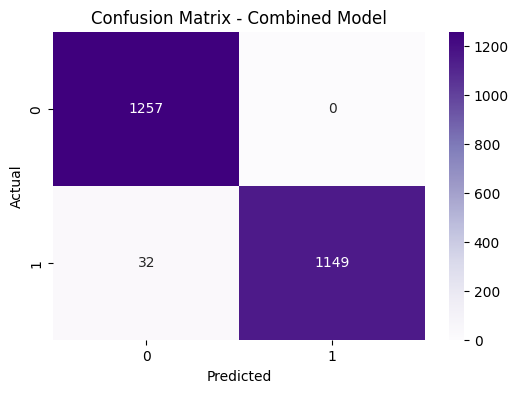

In [16]:
cm_comb = confusion_matrix(y_test_comb, y_pred_comb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_comb, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Combined Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Classification report for combined model

In [14]:
print(classification_report(y_test_comb, y_pred_comb, target_names=['Edible', 'Poisonous']))

              precision    recall  f1-score   support

      Edible       0.98      1.00      0.99      1257
   Poisonous       1.00      0.97      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



## Compare model accuracies

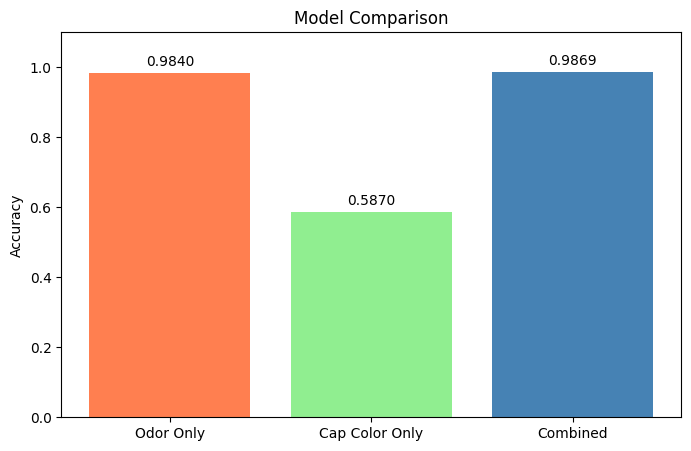

            Model  Accuracy
0       Odor Only  0.984003
1  Cap Color Only  0.586957
2        Combined  0.986874


In [15]:
results = pd.DataFrame({
    'Model': ['Odor Only', 'Cap Color Only', 'Combined'],
    'Accuracy': [accuracy_odor, accuracy_cap, accuracy_comb]
})

plt.figure(figsize=(8, 5))
plt.bar(results['Model'], results['Accuracy'], color=['coral', 'lightgreen', 'steelblue'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1.1)
for i, v in enumerate(results['Accuracy']):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center')
plt.show()

print(results)

### Findings:

- The odor model has an accuracy of 98.40%, indicating that it is an excellent predictor.
- The cap color model has an accuracy of 58.70%, indicating that it cannot predict alone very well.
- Combining both the odor model and the cap color model results in an accuracy of 98.69%, which does provide a little bit more accuracy than odour-only predictions.

### Conclusions:

Odour is by far the most important predictor of whether or not a mushroom can be eaten. The cap colour feature by itself does only slightly better than random chance. Although combining both features will yield a higher degree of accuracy, the increase in accuracy when compared to using odour by itself is very small, indicating that the odour is what differentiates the two types of mushrooms.